In [1]:
from utils import get_current_dir
import pandas as pd

inputpath = get_current_dir().parent / "data" / "artvis_cleaned.csv"
df = pd.read_csv(inputpath)

df = df.replace("null", pd.NA)
display(df.head())


df["a.id"] = df["a.id"].astype("Int64")
df = df.dropna(subset=["a.id"])

df["a.firstname"] = df["a.firstname"].astype("string")
df["a.firstname"] = df["a.firstname"].fillna("Unknown Firstname")

df["a.lastname"] = df["a.lastname"].astype("string")
df["a.lastname"] = df["a.lastname"].fillna("Unknown Lastname")

df["a.gender"] = pd.Categorical(df["a.gender"]).add_categories("Unknown Gender")
df["a.gender"] = df["a.gender"].fillna("Unknown Gender")

df["a.birthdate"] = pd.to_datetime(df["a.birthdate"], errors="coerce")

df["a.deathdate"] = pd.to_datetime(df["a.deathdate"], errors="coerce")

df["a.birthplace"] = df["a.birthplace"].astype("string")
df["a.birthplace"] = df["a.birthplace"].fillna("Unknown Birthplace")

df["a.deathplace"] = df["a.deathplace"].astype("string")
df["a.deathplace"] = df["a.deathplace"].fillna("Unknown Deathplace")

df["a.nationality"] = df["a.nationality"].astype("string")
df["a.nationality"] = df["a.nationality"].fillna("Unknown Nationality")

df["e.id"] = df["e.id"].astype("Int64")
df = df.dropna(subset=["e.id"])

df["e.title"] = df["e.title"].astype("string")
df["e.title"] = df["e.title"].fillna("Unknown Title")

df["e.venue"] = df["e.venue"].astype("string")
df["e.venue"] = df["e.venue"].fillna("Unknown Venue")

df["e.startdate"] = df["e.startdate"].astype("Int64")
df["e.startdate"] = df["e.startdate"].fillna(0)

df["e.type"] = pd.Categorical(df["e.type"]).add_categories("Unknown Type")
df["e.type"] = df["e.type"].fillna("Unknown Type")

df["e.paintings"] = df["e.paintings"].astype("Int64")
df["e.paintings"] = df["e.paintings"].fillna(0)

df["e.country"] = df["e.country"].astype("string")
df["e.country"] = df["e.country"].fillna("Unknown Country")

df["e.city"] = df["e.city"].astype("string")
df["e.city"] = df["e.city"].fillna("Unknown City")

df["e.latitude"] = df["e.latitude"].astype("float64")
df["e.latitude"] = df["e.latitude"].fillna(0)

df["e.longitude"] = df["e.longitude"].astype("float64")
df["e.longitude"] = df["e.longitude"].fillna(0)


print(df.head())
for col in df.columns:
    print(f"column: {col}, type: {df[col].dtype}, unique values: {df[col].nunique()}, null values: {df[col].isnull().sum()}")

,a.id,a.firstname,a.lastname,a.gender,a.birthdate,a.deathdate,a.birthplace,a.deathplace,a.nationality,e.id,e.title,e.venue,e.startdate,e.type,e.paintings,e.country,e.city,e.latitude,e.longitude
0,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,618,Exhibition of the Camden Town Group and Others,Public Art Galleries,1913,group,6,GB,Brighton,50.833333,-0.150000
1,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,720,The Second Exhibition of Works by Members of t...,Goupil Gallery,1915,group,4,GB,London,51.514248,-0.093145
2,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,729,Third Exhibition of Works by Members of the Lo...,Goupil Gallery,1915,group,5,GB,London,51.514248,-0.093145
3,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,650,The First Exhibition of Works by Members of Th...,Goupil Gallery,1914,group,5,GB,London,51.514248,-0.093145
4,1,William Bernard,Adeney,M,1878-01-01,1966-01-01,London,London,GB,680,Twentieth Century Art. A Review of Modern Move...,Whitechapel Art Gallery,1914,group,3,GB,London,51.514248,-0.093145


   a.id      a.firstname a.lastname a.gender a.birthdate a.deathdate  \
0     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
1     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
2     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
3     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   
4     1  William Bernard     Adeney        M  1878-01-01  1966-01-01   

  a.birthplace a.deathplace a.nationality  e.id  \
0       London       London            GB   618   
1       London       London            GB   720   
2       London       London            GB   729   
3       London       London            GB   650   
4       London       London            GB   680   

                                             e.title                  e.venue  \
0     Exhibition of the Camden Town Group and Others     Public Art Galleries   
1  The Second Exhibition of Works by Members of t...           Goupil Gallery   
2  Third Exhibiti

In [2]:
outputpath = get_current_dir().parent / "pages"

# Seaborn

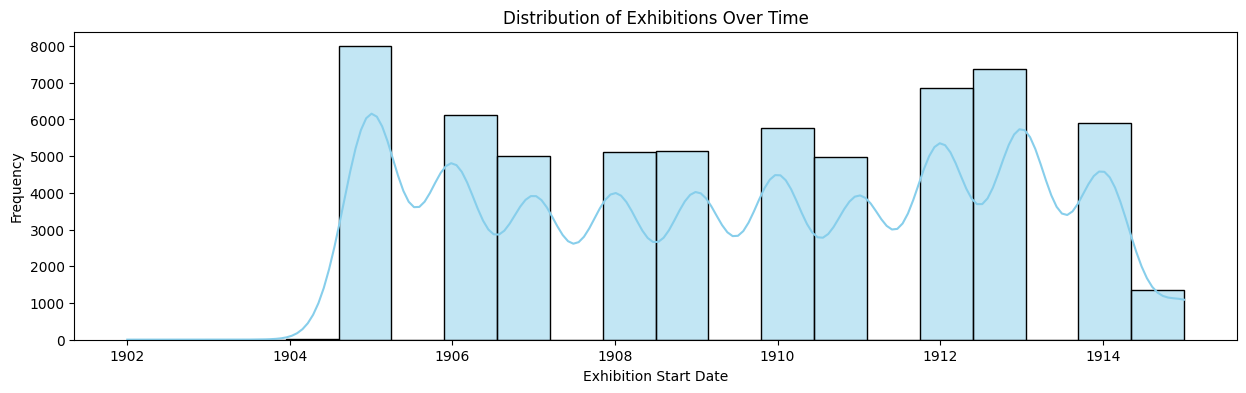

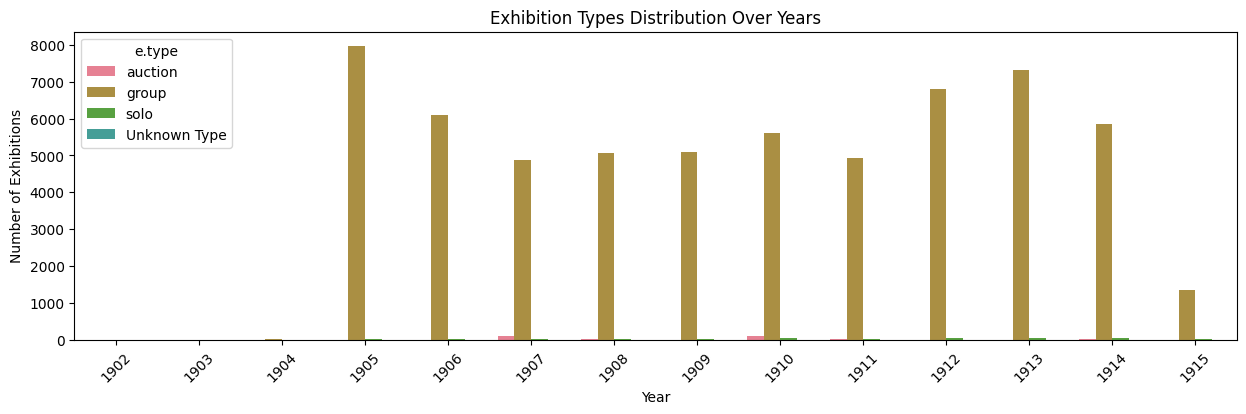

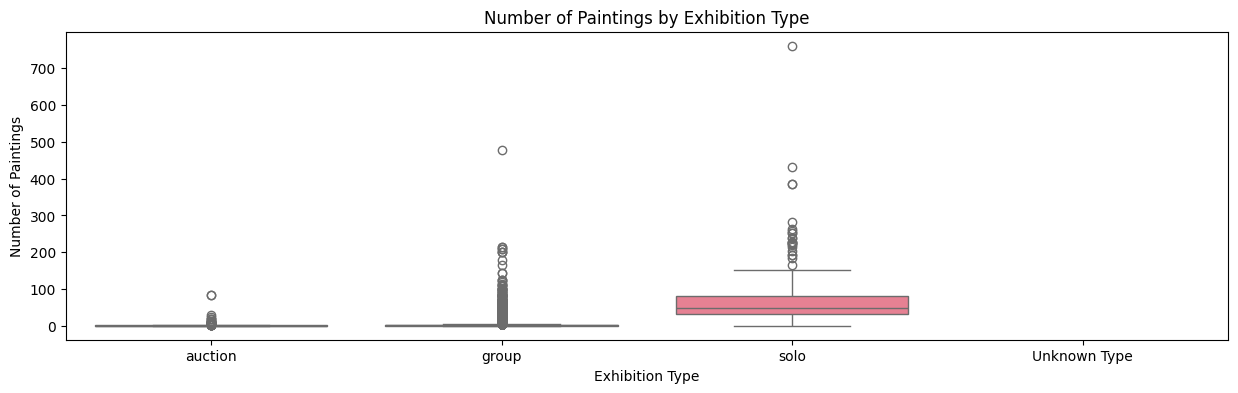

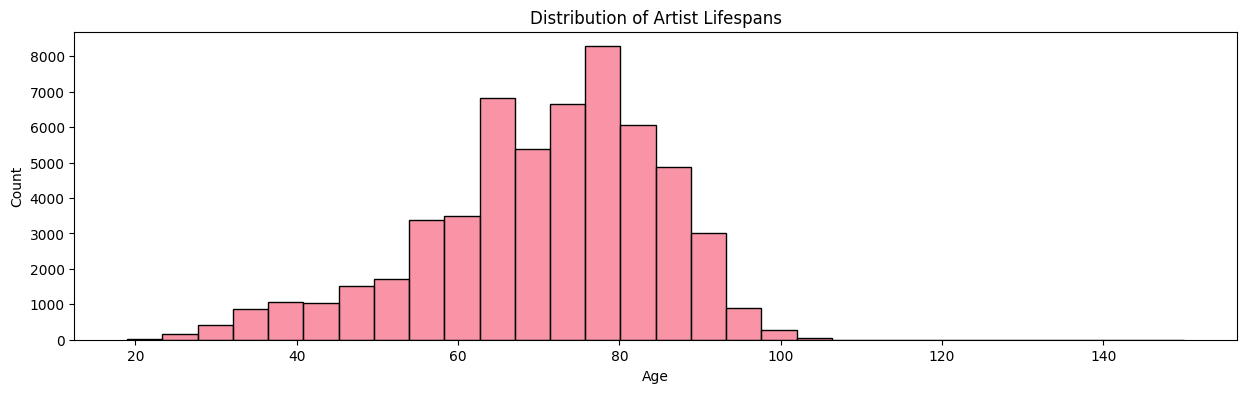

In [3]:
import seaborn as sns
import plotnine as p9
import altair as alt
import pandas as pd
from plotnine import *
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

plt.figure(figsize=(15, 4))
sns.histplot(data=df, x="e.startdate", bins=20, kde=True, color="skyblue")
plt.title("Distribution of Exhibitions Over Time")
plt.xlabel("Exhibition Start Date")
plt.ylabel("Frequency")
plt.show()

sns.set_palette("husl")
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="e.startdate", hue="e.type")
plt.title("Exhibition Types Distribution Over Years")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Exhibitions")
plt.show()

plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="e.type", y="e.paintings")
plt.title("Number of Paintings by Exhibition Type")
plt.xlabel("Exhibition Type")
plt.ylabel("Number of Paintings")
plt.show()


plt.figure(figsize=(15, 4))


def calculate_age(birth, death):
    birth_year = pd.to_datetime(birth).year
    death_year = pd.to_datetime(death).year
    return death_year - birth_year


df["age"] = df.apply(lambda x: calculate_age(x["a.birthdate"], x["a.deathdate"]), axis=1)
sns.histplot(data=df, x="age", bins=30)
plt.title("Distribution of Artist Lifespans")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()